In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import IsolationForest

In [1]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import os
file_path = '/content/drive/MyDrive'
print(os.listdir(file_path))

['Chapter 02.pdf', 'Untitled document (4).gdoc', 'Scanned_20170215-2334.pdf', 'Untitled document (3).gdoc', 'itc.gdoc', 'Untitled document (2).gdoc', 'statement (Autosaved).xlsx', 'AP Practical (VIVA).pdf', 'Omega.xlsx', 'Pp Watch.xlsx', 'Statement Revised.xlsx', 'jumping-math (1).pdf', 'learn-months-year.pdf', 'hour-telling-time-kim-kangaroo.pdf', 'practice-test-counting-money.pdf', 'greater-than-less-than-equal-to-1 (1).pdf', 'practice-test-word-problems1.pdf', 'Scan 4 Sep, 20-58.pdf', 'statement (Autosaved).gsheet', 'EXAMINATION SCHEDULE FALL_2018_29-JAN-2019.pdf', 'Untitled folder', 'imgtopdf_generated_0202191827032.pdf', 'imgtopdf_generated_0202191824002.pdf', 'imgtopdf_generated_0202191829051.pdf', 'imgtopdf_generated_0202191825017.pdf', 'record.xlsx', 'watches', 'Colab Notebooks', 'Untitled0.ipynb', 'Copy of Omega.xlsx', '15793475341544766204324108476047.jpg', 'EL-16106 (1).docx', 'Copy of SA P1: Prepare to Market Project Template.gslides', 'eps.gsheet', 'Tag 1.xlsx', 'owais-bas

In [3]:
file=pd.read_csv(file_path+'/'+'Copy of file.csv')

In [4]:
file['date']=pd.to_datetime(file['date'])

In [6]:
file['day']=file['date'].dt.strftime('%A')

In [8]:
file['month'] = file['date'].dt.month

In [10]:
file['year'] = file['date'].dt.year

In [11]:
file['hour'] = file['date'].dt.hour

In [12]:
file.head()

id                date     user       pc  \
0  {F3E2-X3MV05YQ-3516SZDT} 2010-01-02 07:19:41  SDH2394  PC-5849   
1  {I6N1-Z7VL92UY-8715ESKQ} 2010-01-02 07:21:30  SDH2394  PC-5849   
2  {G4X5-J7MH70FV-8936QVSB} 2010-01-02 07:22:11  SDH2394  PC-5849   
3  {M2M7-Z5ST21EU-6704NSKO} 2010-01-02 07:24:06  SDH2394  PC-5849   
4  {R0A9-O9XB25PE-9236MALV} 2010-01-02 07:24:45  SDH2394  PC-5849   

                  filename    activity  to_removable_media  \
0          R:\60WBQE7S.doc   File Open               False   
1          R:\0VGILDW8.pdf  File Write                True   
2          R:\60WBQE7S.doc   File Copy               False   
3  R:\22B5gX4\H8Y96RRE.doc  File Write                True   
4  R:\SDH2394\7XRCV2N5.pdf   File Copy                True   

   from_removable_media                                            content  \
0                  True  D0-CF-11-E0-A1-B1-1A-E1 Ernesztin's brother, L...   
1                 False  25-50-44-46-2D ---- Bengali As do many other T...   
2                  True  D0-CF-11-E0-A1-B1-1A-E1 Ernesztin's brother, L...   
3                 False  D0-CF-11-E0-A1-B1-1A-E1 After the death of his...   
4                 False  25-50-44-46-2D Although he restored some of th...   

        day  month  year  hour  
0  Saturday      1  2010     7  
1  Saturday      1  2010     7  
2  Saturday      1  2010     7  
3  Saturday      1  2010     7  
4  Saturday      1  2010     7

In [13]:
file.columns

Index(['id', 'date', 'user', 'pc', 'filename', 'activity',
       'to_removable_media', 'from_removable_media', 'content', 'day', 'month',
       'year', 'hour'],
      dtype='object')

In [14]:
file.filename.nunique()

585980

In [15]:
file.shape

(2014883, 13)

In [17]:
len(file.filename.value_counts(dropna=False))

585980

In [23]:
label_encoder = LabelEncoder()
file['user_encoded'] = label_encoder.fit_transform(file['user'])


In [24]:
file['pc_encoded'] = label_encoder.fit_transform(file['pc'])

In [25]:
file['activity_encoded'] = label_encoder.fit_transform(file['activity'])

In [26]:
file['to_removable_media_encoded'] = label_encoder.fit_transform(file['to_removable_media'])

In [27]:
file['from_removable_media_encoded'] = label_encoder.fit_transform(file['from_removable_media'])

In [28]:
file['day_encoded']=label_encoder.fit_transform(file['day'])

In [29]:
file.dtypes

id                                      object
date                            datetime64[ns]
user                                    object
pc                                      object
filename                                object
activity                                object
to_removable_media                        bool
from_removable_media                      bool
content                                 object
day                                     object
month                                    int64
year                                     int64
hour                                     int64
user_encoded                             int64
pc_encoded                               int64
activity_encoded                         int64
to_removable_media_encoded               int64
from_removable_media_encoded             int64
day_encoded                              int64
dtype: object

In [30]:
numerical_columns = ['month','year','hour','user_encoded', 'activity_encoded', 'pc_encoded','to_removable_media_encoded','from_removable_media_encoded','day_encoded']

In [31]:
isolation_forest = IsolationForest(contamination=0.05)

In [32]:
isolation_forest.fit(file[numerical_columns])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.05)

In [33]:
file['anomaly_score'] = isolation_forest.decision_function(file[numerical_columns])
file['anomaly_label'] = isolation_forest.predict(file[numerical_columns])

In [34]:
file.head()

id                date     user       pc  \
0  {F3E2-X3MV05YQ-3516SZDT} 2010-01-02 07:19:41  SDH2394  PC-5849   
1  {I6N1-Z7VL92UY-8715ESKQ} 2010-01-02 07:21:30  SDH2394  PC-5849   
2  {G4X5-J7MH70FV-8936QVSB} 2010-01-02 07:22:11  SDH2394  PC-5849   
3  {M2M7-Z5ST21EU-6704NSKO} 2010-01-02 07:24:06  SDH2394  PC-5849   
4  {R0A9-O9XB25PE-9236MALV} 2010-01-02 07:24:45  SDH2394  PC-5849   

                  filename    activity  to_removable_media  \
0          R:\60WBQE7S.doc   File Open               False   
1          R:\0VGILDW8.pdf  File Write                True   
2          R:\60WBQE7S.doc   File Copy               False   
3  R:\22B5gX4\H8Y96RRE.doc  File Write                True   
4  R:\SDH2394\7XRCV2N5.pdf   File Copy                True   

   from_removable_media                                            content  \
0                  True  D0-CF-11-E0-A1-B1-1A-E1 Ernesztin's brother, L...   
1                 False  25-50-44-46-2D ---- Bengali As do many other T...   
2                  True  D0-CF-11-E0-A1-B1-1A-E1 Ernesztin's brother, L...   
3                 False  D0-CF-11-E0-A1-B1-1A-E1 After the death of his...   
4                 False  25-50-44-46-2D Although he restored some of th...   

        day  ...  year  hour  user_encoded  pc_encoded  activity_encoded  \
0  Saturday  ...  2010     7          2657        2257                 2   
1  Saturday  ...  2010     7          2657        2257                 3   
2  Saturday  ...  2010     7          2657        2257                 0   
3  Saturday  ...  2010     7          2657        2257                 3   
4  Saturday  ...  2010     7          2657        2257                 0   

   to_removable_media_encoded  from_removable_media_encoded  day_encoded  \
0                           0                             1            2   
1                           1                             0            2   
2                           0                             1            2   
3                           1                             0            2   
4                           1                             0            2   

   anomaly_score  anomaly_label  
0       0.048143              1  
1       0.011752              1  
2       0.050242              1  
3       0.011752              1  
4       0.025863              1  

[5 rows x 21 columns]

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


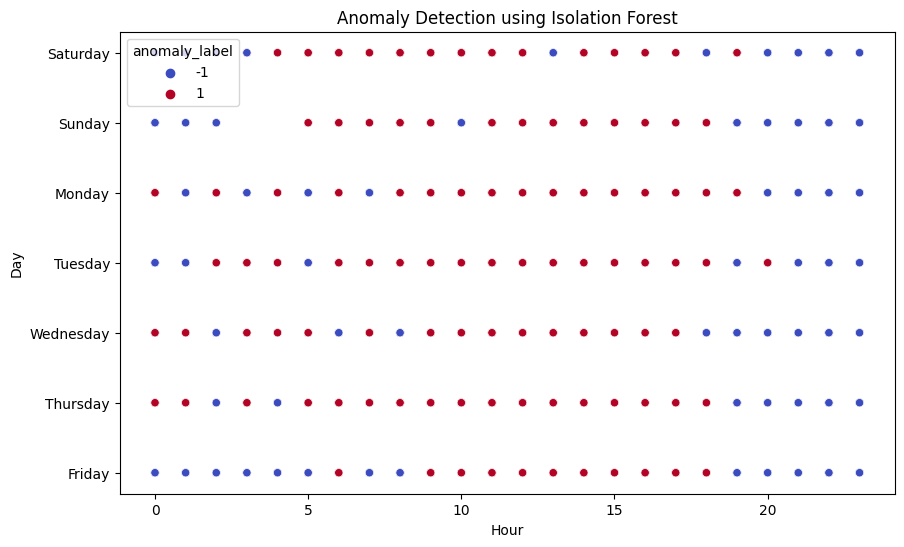

In [35]:
# Visualize anomalies
plt.figure(figsize=(10, 6))
sns.scatterplot(data=file, x='hour', y='day', hue='anomaly_label', palette='coolwarm')
plt.title('Anomaly Detection using Isolation Forest')
plt.xlabel('Hour')
plt.ylabel('Day')
plt.show()

In [36]:
output_path = '/content/drive/MyDrive/file_results.csv'

# Save the DataFrame as a CSV file
file.to_csv(output_path, index=False)